In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
import seaborn as sns

In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/Image data').with_suffix('')

In [ ]:
data = '/content/drive/MyDrive/Image data'

paths = [path.parts[-2:] for path in
         pathlib.Path(data).rglob('*.*')]
df = pd.DataFrame(data=paths, columns=['Class','Images'])
df = df.sort_values('Class',ascending=True)
df.reset_index(drop=True, inplace=True)
df

,Class,Images
0,1.5k Ohm resistor,1.5k_15.jpg
1,1.5k Ohm resistor,1.5k_18.jpg
2,1.5k Ohm resistor,1.5k_3.jpg
3,1.5k Ohm resistor,1.5k_4.jpg
4,1.5k Ohm resistor,1.5k_19.jpg
...,...,...
375,Image data,5.6k Ohm resistor
376,Image data,4.6k Ohm resistor
377,Image data,3.3k ohm only
378,Image data,2.7k Ohm resistor


In [ ]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 380
Class Count : 16 

Count the number of images in each class
1.5k Ohm resistor    25
10 Ohm resistor      25
100k ohm resistor    25
10k Ohm resistor     25
120 Ohm resistor     25
1k ohm only          25
2.7k Ohm resistor    25
22k Ohm resistor     25
3.3k ohm only        25
33 ohm resistor      25
330 Ohm resistor     25
4.6k Ohm resistor    25
47 Ohm resistor      25
470 Ohm resistor     25
5.6k Ohm resistor    25
Image data            5
Name: Class, dtype: int64


<ipython-input-6-ded4145dcf01>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


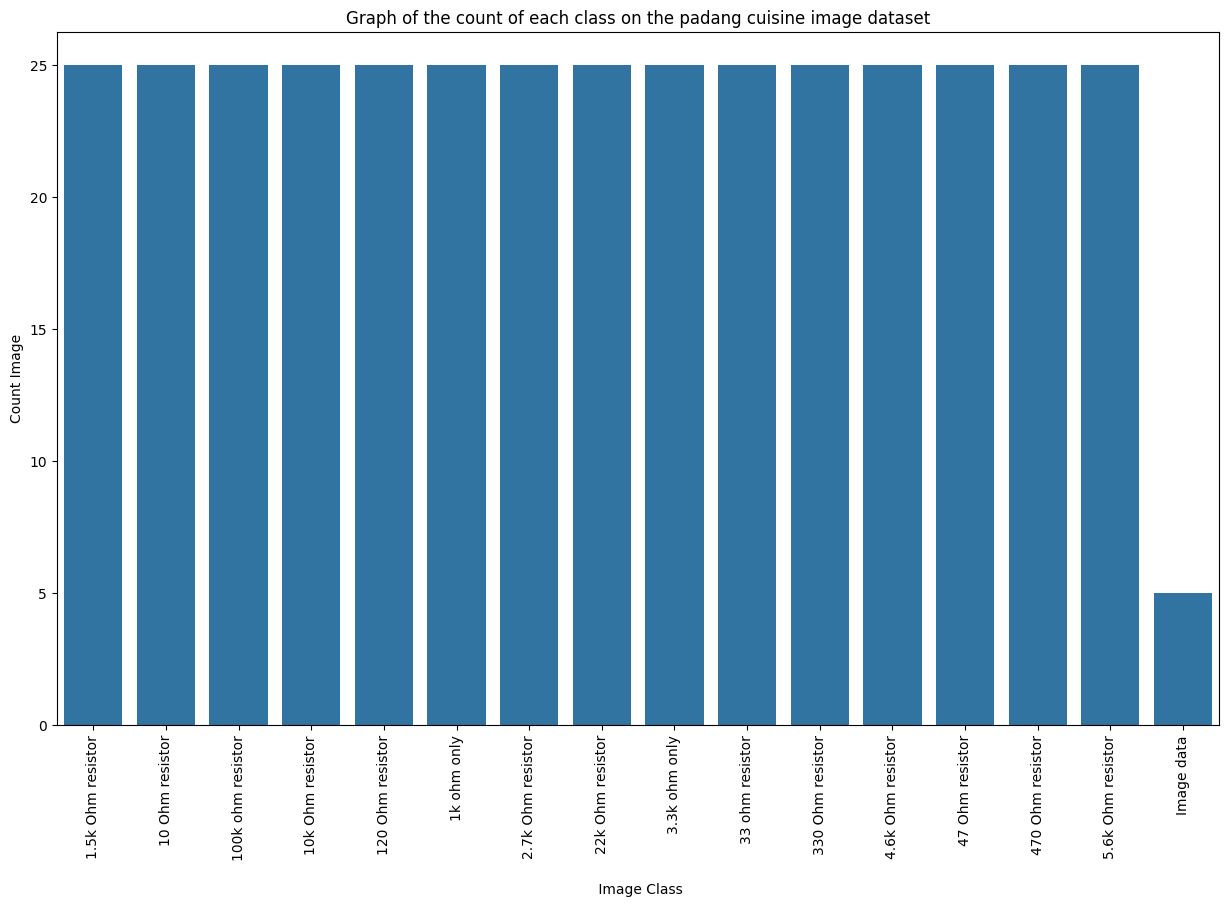

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df, x='Class')
plt.title('Graph of the count of each class on the padang cuisine image dataset')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpeg')))+len(list(data_dir.glob('*/*.jpg')))+len(list(data_dir.glob('*/*.png')))
print(image_count)

375


In [ ]:
directories = {'1.5k': '/content/drive/MyDrive/Image data/1.5k Ohm resistor',
               '2.7k': '/content/drive/MyDrive/Image data/2.7k Ohm resistor',
               '10k': '/content/drive/MyDrive/Image data/10k Ohm resistor',
               '100k': '/content/drive/MyDrive/Image data/100k ohm resistor',
               '22k': '/content/drive/MyDrive/Image data/22k Ohm resistor',
               '3.3k': '/content/drive/MyDrive/Image data/3.3k ohm only',
               '33': '/content/drive/MyDrive/Image data/33 ohm resistor',
               '330': '/content/drive/MyDrive/Image data/330 Ohm resistor',
               '4.6k': '/content/drive/MyDrive/Image data/4.6k Ohm resistor',
               '47': '/content/drive/MyDrive/Image data/47 Ohm resistor',
               '470': '/content/drive/MyDrive/Image data/470 Ohm resistor',
               '5.6k': '/content/drive/MyDrive/Image data/5.6k Ohm resistor',
               '10': '/content/drive/MyDrive/Image data/10 Ohm resistor',
               '120': '/content/drive/MyDrive/Image data/120 Ohm resistor',
               '1k': '/content/drive/MyDrive/Image data/1k ohm only',

              }


In [ ]:
def get_dims(file):
  im = Image.open(file)

  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

def get_rgb(file):
    im = Image.open(file)
    arr = np.array(im)
    r_mean = np.mean(arr[:,:,0])
    g_mean = np.mean(arr[:,:,1])
    b_mean = np.mean(arr[:,:,2])
    bright_mean = np.mean([r_mean, g_mean, b_mean])
    return r_mean, g_mean, b_mean, bright_mean

[########################################] | 100% Completed | 4.39 s
[########################################] | 100% Completed | 4.63 s
[########################################] | 100% Completed | 4.39 s
[########################################] | 100% Completed | 4.08 s
[########################################] | 100% Completed | 4.74 s
[########################################] | 100% Completed | 3.98 s
[########################################] | 100% Completed | 4.22 s
[########################################] | 100% Completed | 4.81 s
[########################################] | 100% Completed | 4.22 s
[########################################] | 100% Completed | 4.29 s
[########################################] | 100% Completed | 4.91 s
[########################################] | 100% Completed | 3.98 s
[########################################] | 100% Completed | 4.41 s
[########################################] | 100% Completed | 4.22 s
[#################################

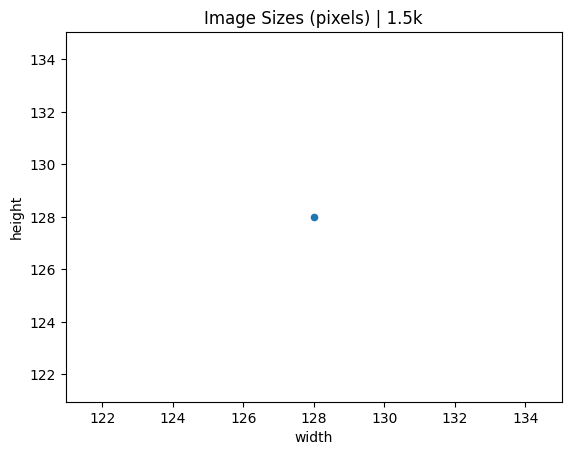

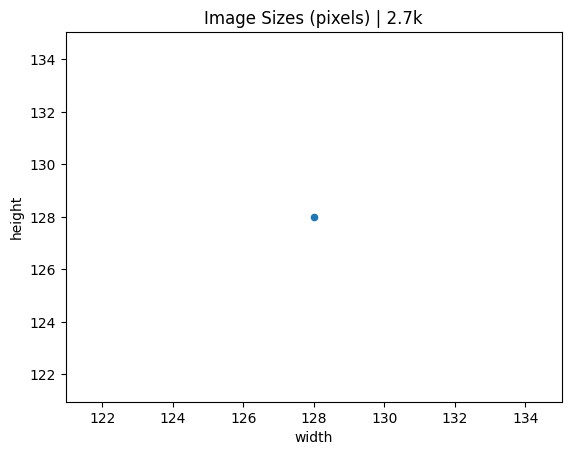

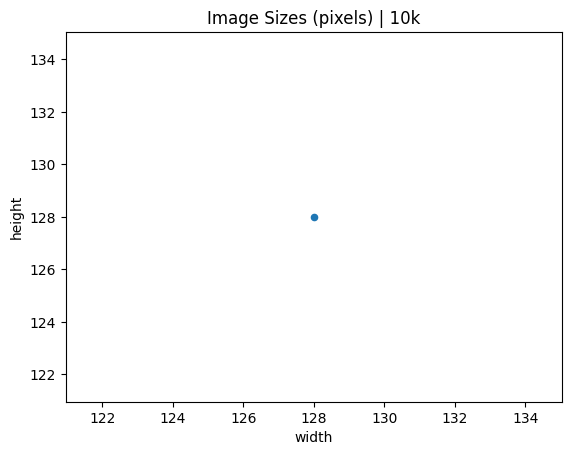

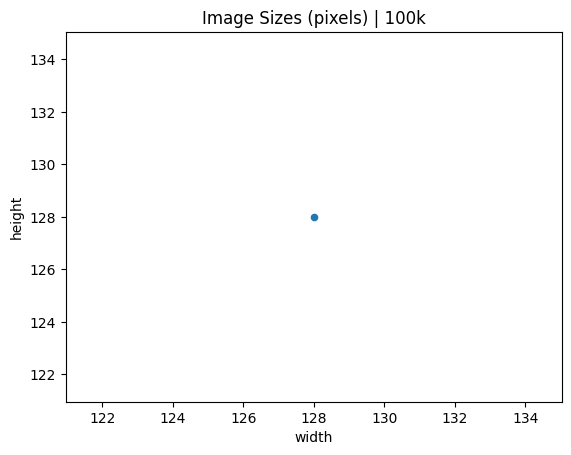

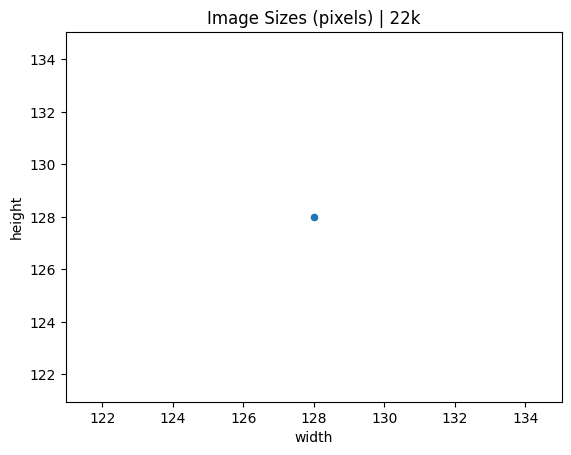

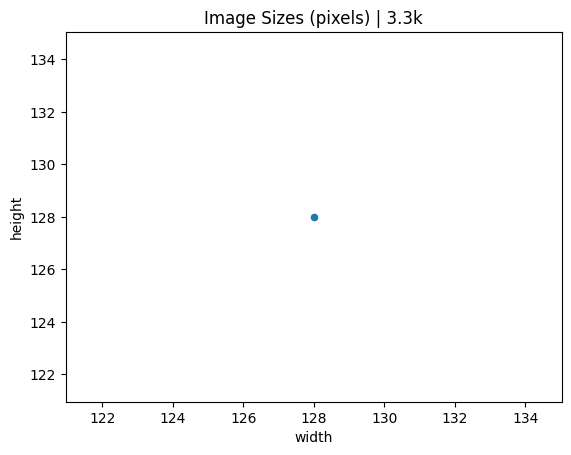

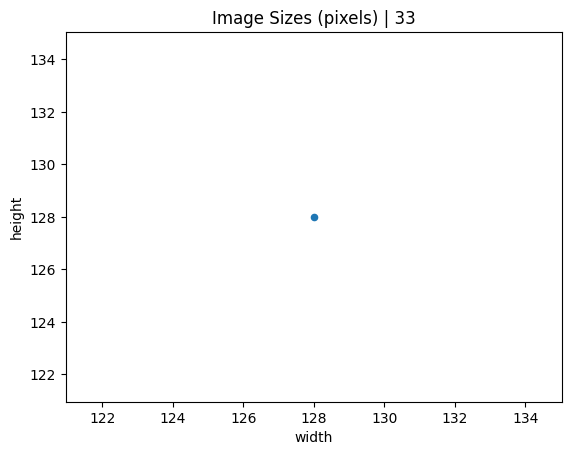

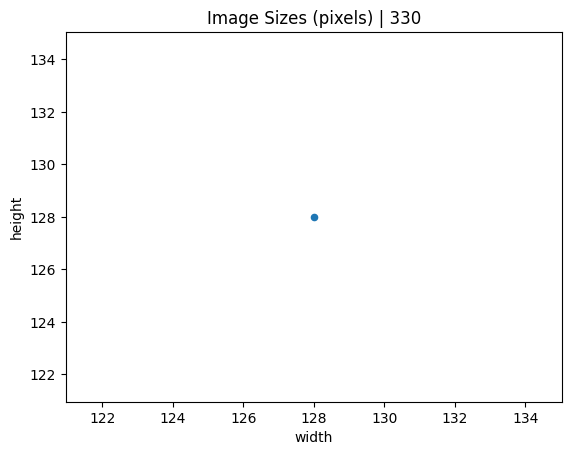

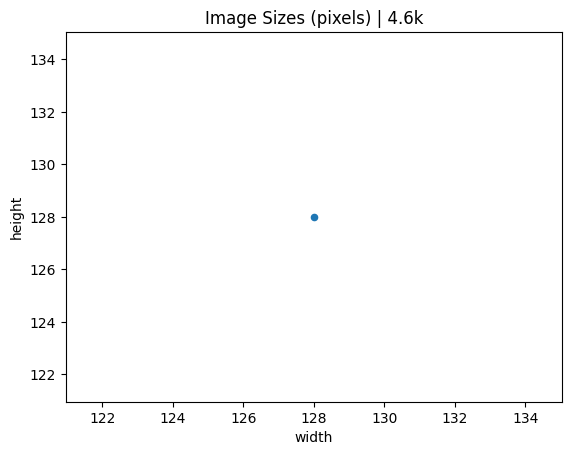

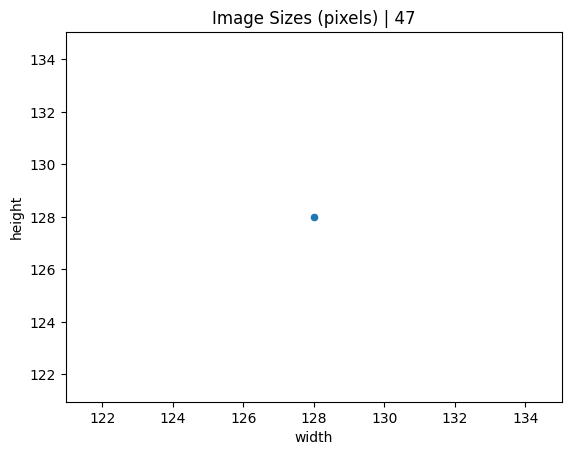

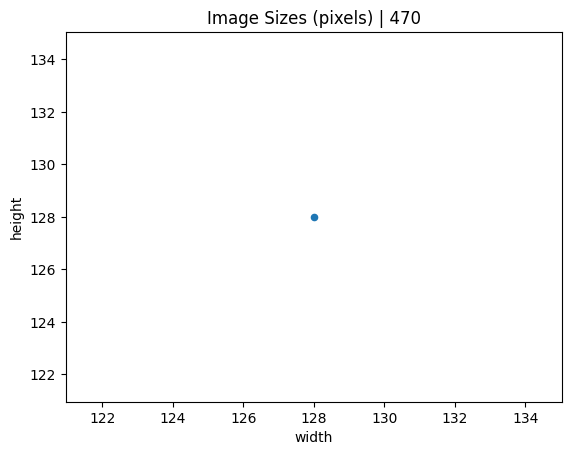

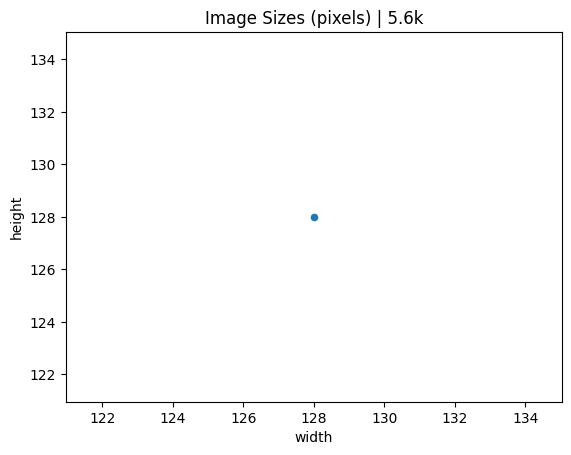

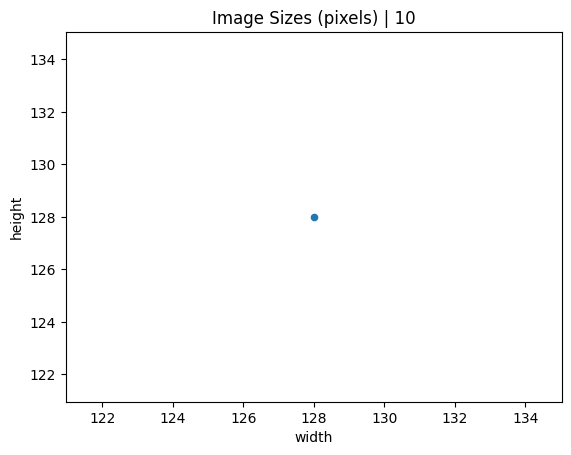

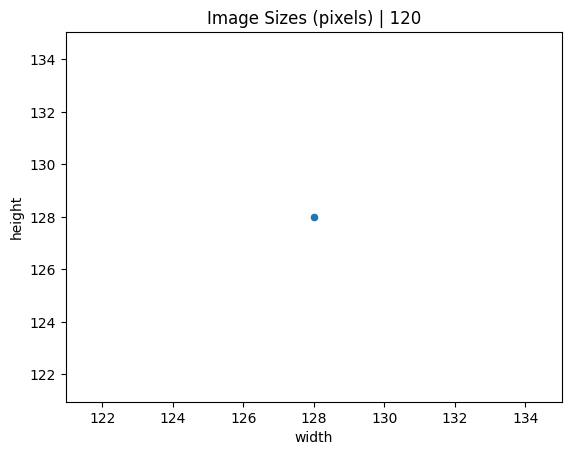

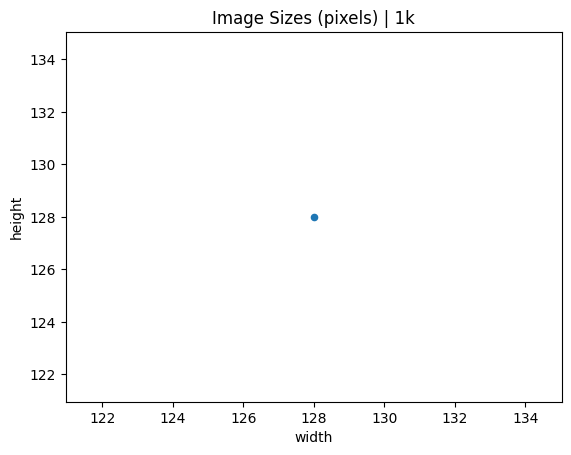

In [ ]:
import os
import dask.bag as db
import dask.array as da
from dask.diagnostics import ProgressBar
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



for n,d in directories.items():
  filepath = d
  filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)

  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

<Axes: xlabel='Brightness', ylabel='Count'>

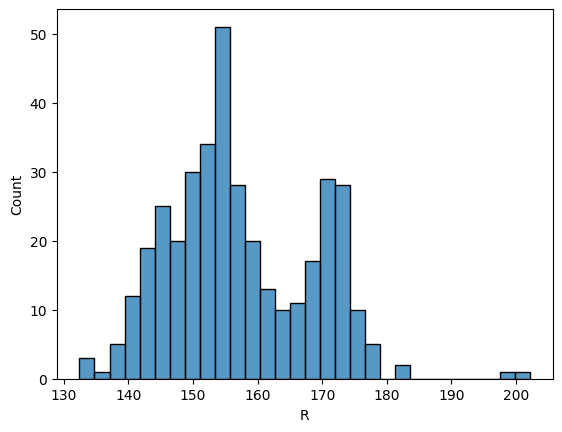

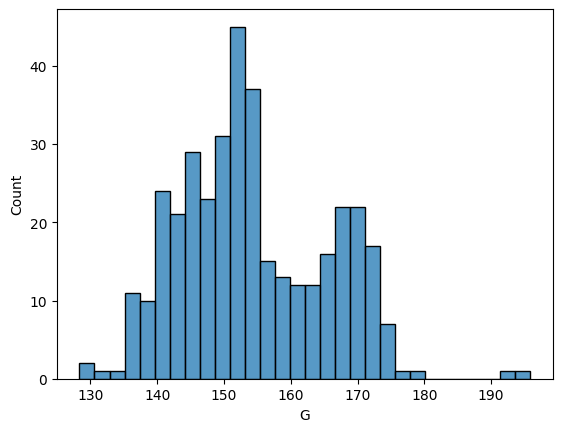

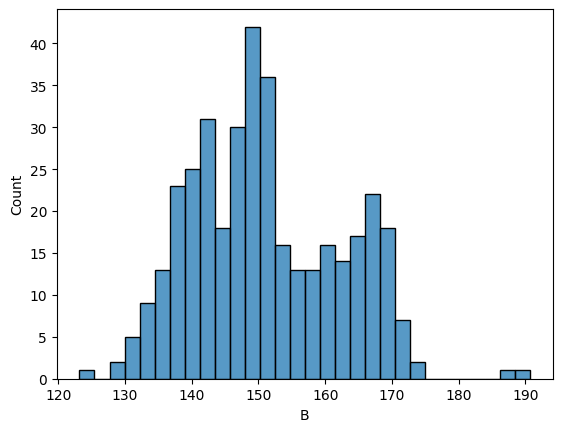

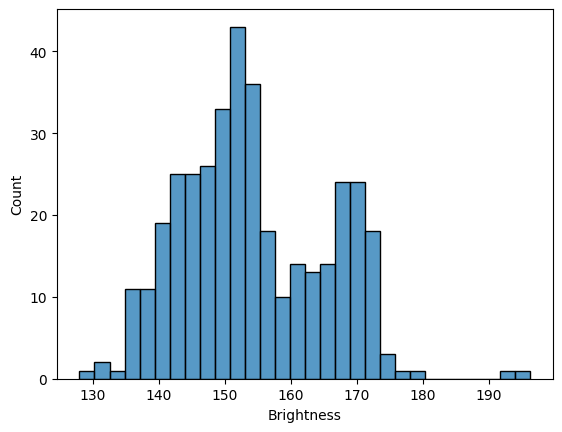

In [ ]:
filelist = []
for n, d in directories.items():
    filepath = d
    filelist += [os.path.join(filepath, f) for f in os.listdir(filepath)]

r_array=[]
g_array=[]
b_array=[]
bright_array=[]
for file in filelist:
    rm, gm, bm, brm = get_rgb(file)
    r_array.append(rm)
    g_array.append(gm)
    b_array.append(bm)
    bright_array.append(brm)


rgbb_df=pd.DataFrame({ 'R':r_array,
                       'G':g_array,
                       'B':b_array,
                       'Brightness':bright_array})
fig1 = plt.figure()
sns.histplot(data=rgbb_df, x = 'R',  bins=30)
fig2 = plt.figure()
sns.histplot(data=rgbb_df, x = 'G',  bins=30)
fig3=plt.figure()
sns.histplot(data=rgbb_df, x = 'B',  bins=30)
fig4=plt.figure()
sns.histplot(data=rgbb_df, x = 'Brightness',  bins=30)

In [ ]:
rgbb_df.describe()


,R,G,B,Brightness
count,375.000000,375.000000,375.000000,375.000000
mean,157.300788,154.266772,151.027785,154.198448
std,11.079747,11.031907,11.145710,11.027162
min,132.423645,128.353394,123.175659,127.984233
25%,149.609192,145.898102,142.562134,146.003357
50%,155.023010,152.311829,149.795715,152.103617
75%,167.067810,163.643127,160.239136,163.612935
max,202.216248,195.873840,190.742920,196.277669


In [ ]:
rgbb_df.skew()


R             0.472112
G             0.412675
B             0.370182
Brightness    0.419944
dtype: float64

In [ ]:
rgbb_df.kurtosis()


R             0.103023
G            -0.172054
B            -0.323247
Brightness   -0.135837
dtype: float64

In [ ]:
from PIL import Image
import os

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    for file in filelist:
        im = Image.open(file)
        im = im.resize((128,128))
        im = im.convert('RGB')
        im.save(file)


In [ ]:
data_dir_ini = pathlib.Path('data_ini').with_suffix('')
data_ini = '/content/drive/MyDrive/Image data'

paths_ini = [path.parts[-2:] for path in
         pathlib.Path(data_ini).rglob('*.*')]
df_ini = pd.DataFrame(data=paths_ini, columns=['Class','Images'])
df_ini = df_ini.sort_values('Class',ascending=True)
df_ini.reset_index(drop=True, inplace=True)
df_ini

,Class,Images
0,1.5k Ohm resistor,1.5k_15.jpg
1,1.5k Ohm resistor,1.5k_18.jpg
2,1.5k Ohm resistor,1.5k_3.jpg
3,1.5k Ohm resistor,1.5k_4.jpg
4,1.5k Ohm resistor,1.5k_19.jpg
...,...,...
375,Image data,5.6k Ohm resistor
376,Image data,4.6k Ohm resistor
377,Image data,3.3k ohm only
378,Image data,2.7k Ohm resistor


In [ ]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df_ini.Images)))
print("Class Count : {} \n".format(len(df_ini['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())
image_count = len(list(data_dir.glob('*/*.jpeg')))+len(list(data_dir.glob('*/*.jpg')))+len(list(data_dir.glob('*/*.png'))) # folder/name <- */*
print(image_count)

Count the number of image datasets
Image Count : 380
Class Count : 16 

Count the number of images in each class
1.5k Ohm resistor    25
10 Ohm resistor      25
100k ohm resistor    25
10k Ohm resistor     25
120 Ohm resistor     25
1k ohm only          25
2.7k Ohm resistor    25
22k Ohm resistor     25
3.3k ohm only        25
33 ohm resistor      25
330 Ohm resistor     25
4.6k Ohm resistor    25
47 Ohm resistor      25
470 Ohm resistor     25
5.6k Ohm resistor    25
Image data            5
Name: Class, dtype: int64
375


In [ ]:
directories = {'1.5k': '/content/drive/MyDrive/Image data/1.5k Ohm resistor',
               '2.7k': '/content/drive/MyDrive/Image data/2.7k Ohm resistor',
               '10k': '/content/drive/MyDrive/Image data/10k Ohm resistor',
               '100k': '/content/drive/MyDrive/Image data/100k ohm resistor',
               '22k': '/content/drive/MyDrive/Image data/22k Ohm resistor',
               '3.3k': '/content/drive/MyDrive/Image data/3.3k ohm only',
               '33': '/content/drive/MyDrive/Image data/33 ohm resistor',
               '330': '/content/drive/MyDrive/Image data/330 Ohm resistor',
               '4.6k': '/content/drive/MyDrive/Image data/4.6k Ohm resistor',
               '47': '/content/drive/MyDrive/Image data/47 Ohm resistor',
               '470': '/content/drive/MyDrive/Image data/470 Ohm resistor',
               '5.6k': '/content/drive/MyDrive/Image data/5.6k Ohm resistor',
               '10': '/content/drive/MyDrive/Image data/10 Ohm resistor',
               '120': '/content/drive/MyDrive/Image data/120 Ohm resistor',
               '1k': '/content/drive/MyDrive/Image data/1k ohm only',

              }
def get_dims(file):
  im = Image.open(file)

  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

def get_rgb(file):
    im = Image.open(file)
    arr = np.array(im)
    r_mean = np.mean(arr[:,:,0])
    g_mean = np.mean(arr[:,:,1])
    b_mean = np.mean(arr[:,:,2])
    bright_mean = np.mean([r_mean, g_mean, b_mean])
    return r_mean, g_mean, b_mean, bright_mean

[########################################] | 100% Completed | 1.44 s
[########################################] | 100% Completed | 1.44 s
[########################################] | 100% Completed | 2.34 s
[########################################] | 100% Completed | 2.23 s
[########################################] | 100% Completed | 1.35 s
[########################################] | 100% Completed | 1.47 s
[########################################] | 100% Completed | 1.39 s
[########################################] | 100% Completed | 1.37 s
[########################################] | 100% Completed | 1.44 s
[########################################] | 100% Completed | 2.85 s
[########################################] | 100% Completed | 2.01 s
[########################################] | 100% Completed | 1.45 s
[########################################] | 100% Completed | 1.47 s
[########################################] | 100% Completed | 1.45 s
[#################################

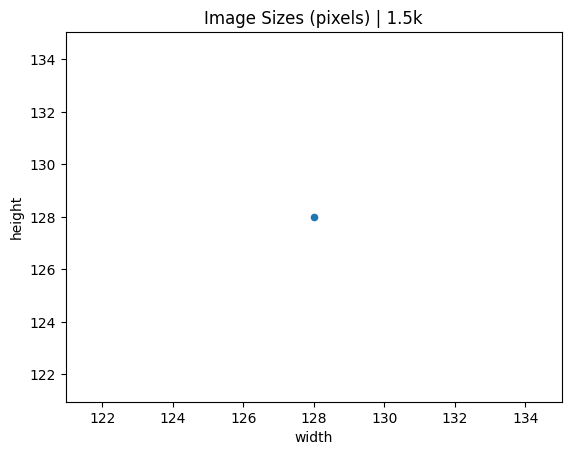

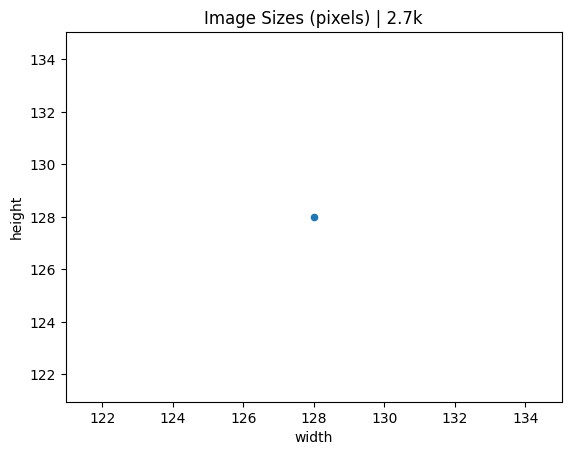

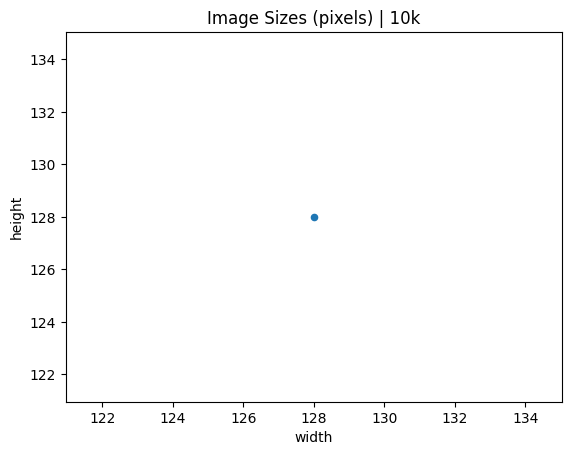

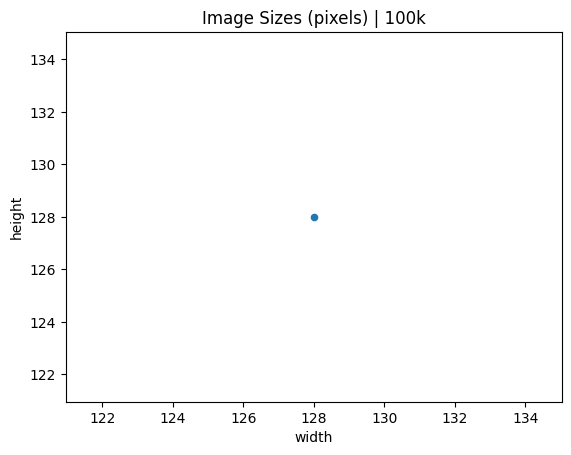

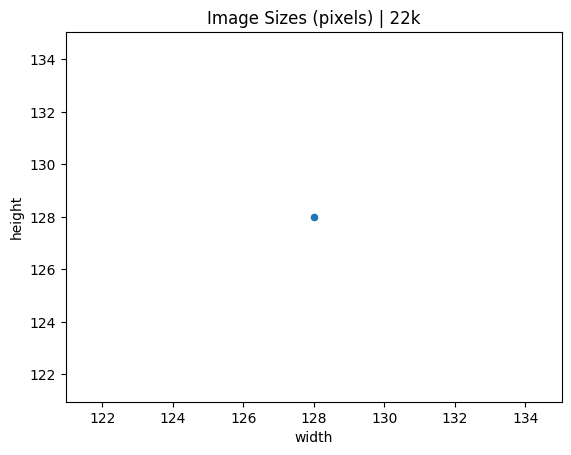

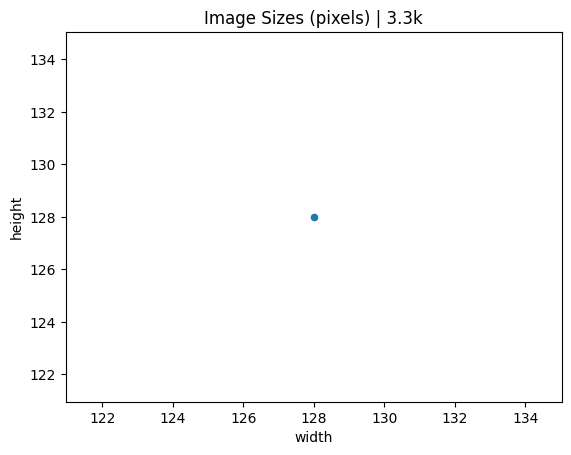

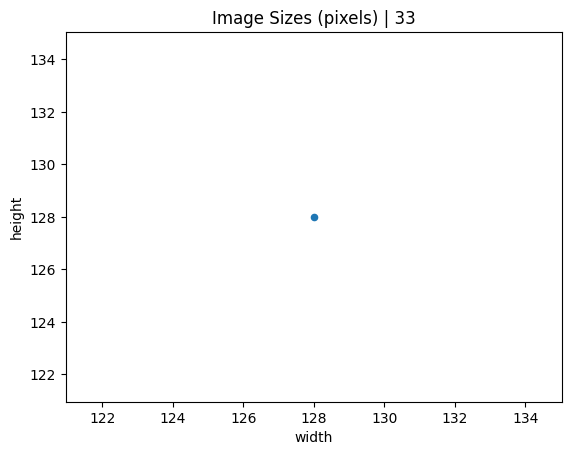

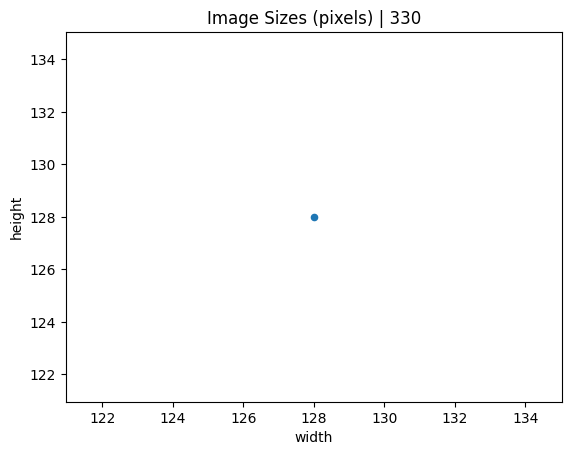

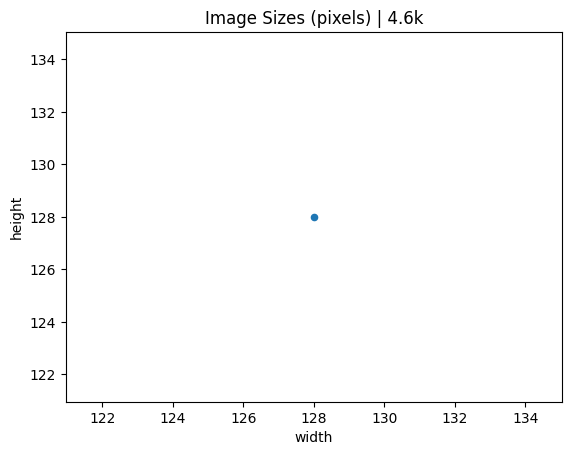

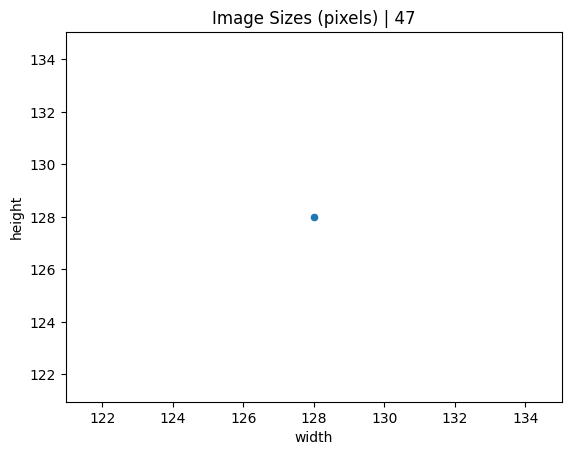

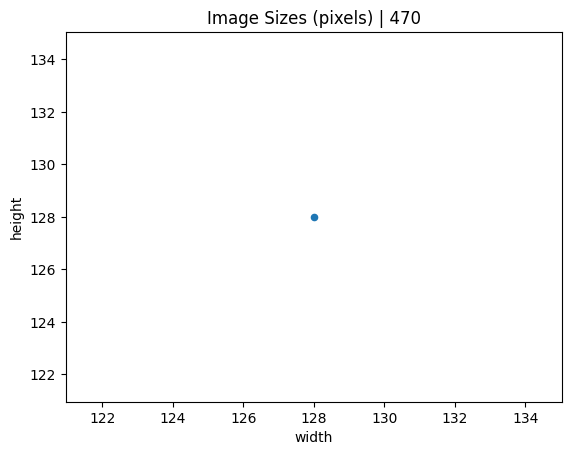

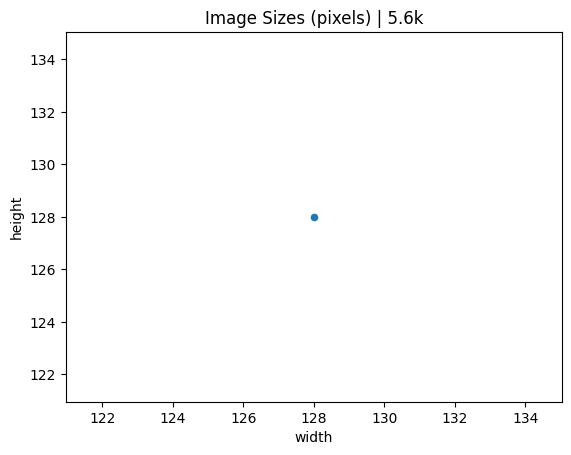

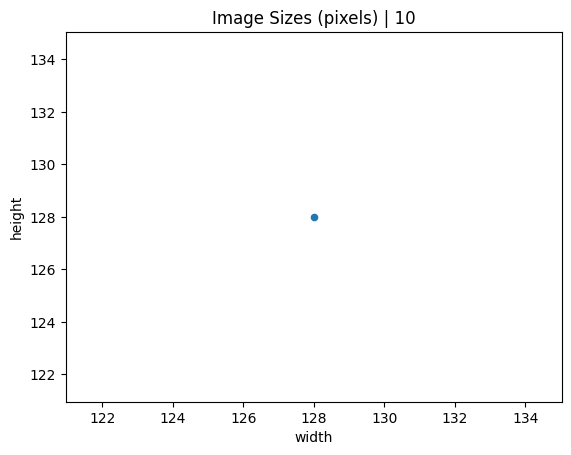

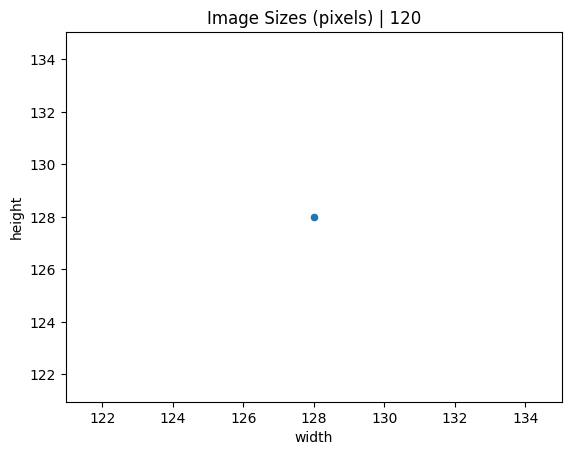

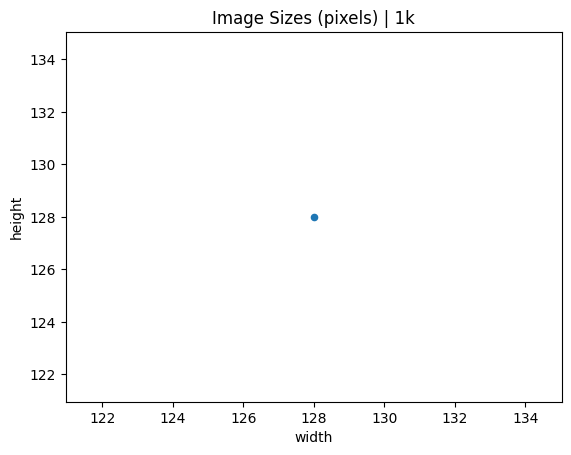

In [ ]:

for n,d in directories.items():
  filepath = d
  filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)

  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))


In [ ]:
batch_size = 16
img_height = 128
img_width = 128

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 375 files belonging to 15 classes.
Using 300 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(  #the tf terminology for this method demands the term validation where we we might otherwise use the term test. Just know that validation in this case means test, we're not doing a 3-way split of the data nor k-fold cross-validation
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 375 files belonging to 15 classes.
Using 75 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['1.5k Ohm resistor', '10 Ohm resistor', '100k ohm resistor', '10k Ohm resistor', '120 Ohm resistor', '1k ohm only', '2.7k Ohm resistor', '22k Ohm resistor', '3.3k ohm only', '33 ohm resistor', '330 Ohm resistor', '4.6k Ohm resistor', '47 Ohm resistor', '470 Ohm resistor', '5.6k Ohm resistor']


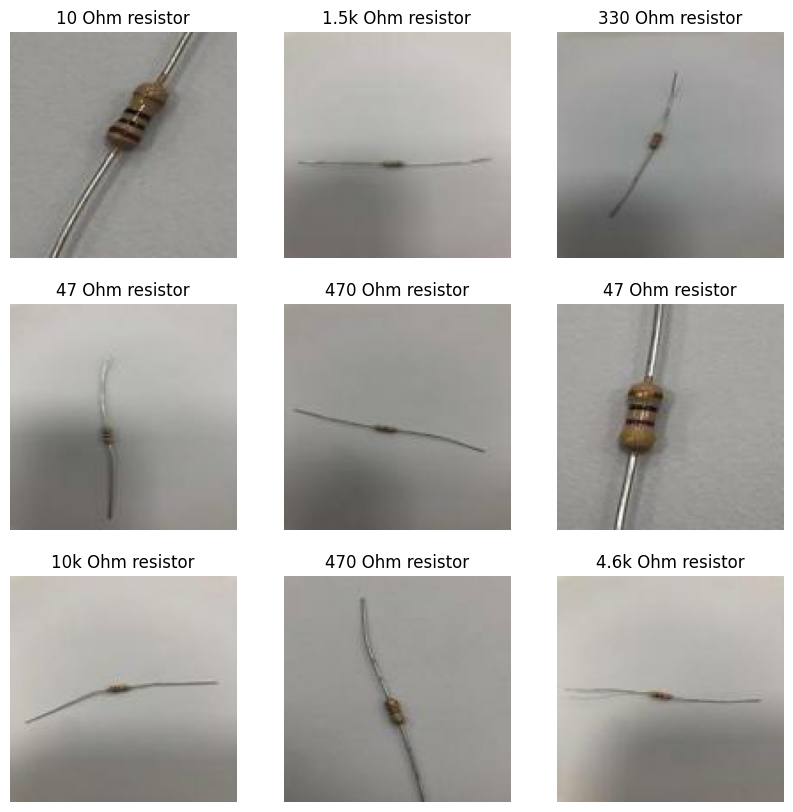

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names_train = train_ds.class_names
print(class_names_train)

['1.5k Ohm resistor', '10 Ohm resistor', '100k ohm resistor', '10k Ohm resistor', '120 Ohm resistor', '1k ohm only', '2.7k Ohm resistor', '22k Ohm resistor', '3.3k ohm only', '33 ohm resistor', '330 Ohm resistor', '4.6k Ohm resistor', '47 Ohm resistor', '470 Ohm resistor', '5.6k Ohm resistor']


In [ ]:
class_names_test = val_ds.class_names
print(class_names_test)

['1.5k Ohm resistor', '10 Ohm resistor', '100k ohm resistor', '10k Ohm resistor', '120 Ohm resistor', '1k ohm only', '2.7k Ohm resistor', '22k Ohm resistor', '3.3k ohm only', '33 ohm resistor', '330 Ohm resistor', '4.6k Ohm resistor', '47 Ohm resistor', '470 Ohm resistor', '5.6k Ohm resistor']


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
num_classes = len(class_names_train)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=30
history_CNN = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
19/19 [==============================] - 9s 359ms/step - loss: 2.7610 - accuracy: 0.0600 - val_loss: 2.7104 - val_accuracy: 0.0933
Epoch 2/30
19/19 [==============================] - 7s 337ms/step - loss: 2.7100 - accuracy: 0.0533 - val_loss: 2.7093 - val_accuracy: 0.0800
Epoch 3/30
19/19 [==============================] - 5s 244ms/step - loss: 2.7091 - accuracy: 0.0733 - val_loss: 2.7093 - val_accuracy: 0.0667
Epoch 4/30
19/19 [==============================] - 7s 345ms/step - loss: 2.7051 - accuracy: 0.0900 - val_loss: 2.7120 - val_accuracy: 0.0667
Epoch 5/30
19/19 [==============================] - 5s 260ms/step - loss: 2.7102 - accuracy: 0.0767 - val_loss: 2.7227 - val_accuracy: 0.0667
Epoch 6/30
19/19 [==============================] - 5s 247ms/step - loss: 2.6882 - accuracy: 0.1300 - val_loss: 2.7156 - val_accuracy: 0.0267
Epoch 7/30
19/19 [==============================] - 7s 377ms/step - loss: 2.6473 - accuracy: 0.1433 - val_loss: 2.6890 - val_accuracy: 0.0933
Epoch 

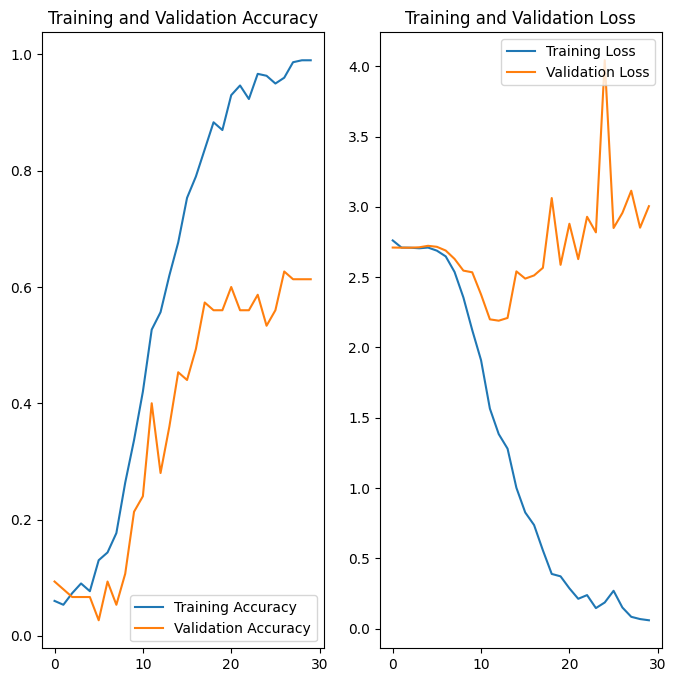

In [ ]:
acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']

loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_height = 128
img_width = 128
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

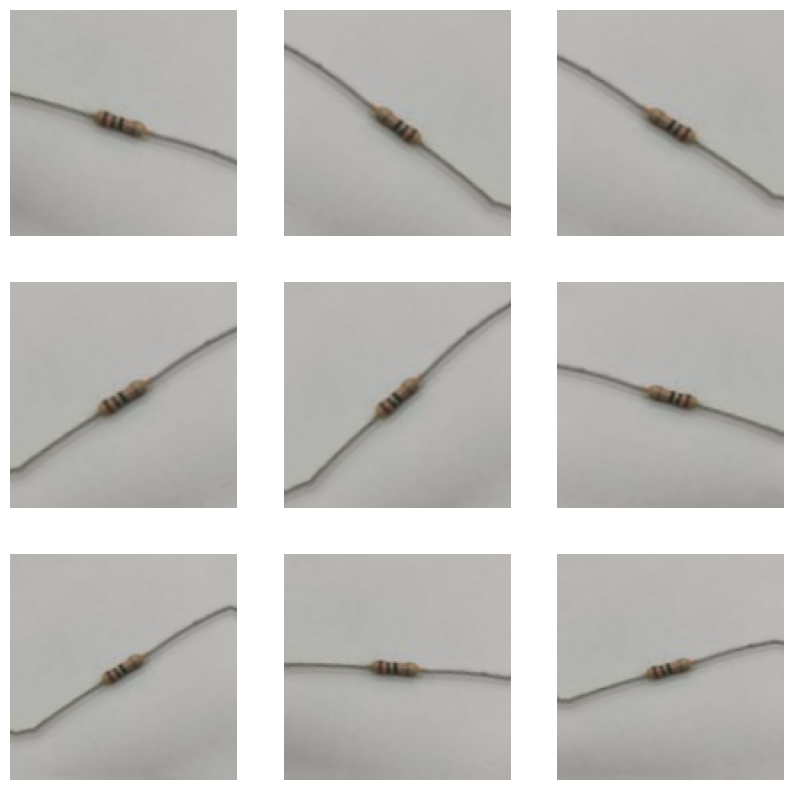

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
from keras.optimizers import Adam
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 100
history_augmentation = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
19/19 [==============================] - 8s 300ms/step - loss: 2.8056 - accuracy: 0.0600 - val_loss: 2.7072 - val_accuracy: 0.0667
Epoch 2/100
19/19 [==============================] - 7s 376ms/step - loss: 2.7083 - accuracy: 0.0633 - val_loss: 2.7084 - val_accuracy: 0.0533
Epoch 3/100
19/19 [==============================] - 7s 331ms/step - loss: 2.7079 - accuracy: 0.0633 - val_loss: 2.7088 - val_accuracy: 0.0667
Epoch 4/100
19/19 [==============================] - 6s 291ms/step - loss: 2.7071 - accuracy: 0.0833 - val_loss: 2.7107 - val_accuracy: 0.0533
Epoch 5/100
19/19 [==============================] - 8s 386ms/step - loss: 2.7096 - accuracy: 0.0700 - val_loss: 2.7089 - val_accuracy: 0.0533
Epoch 6/100
19/19 [==============================] - 6s 304ms/step - loss: 2.7061 - accuracy: 0.0800 - val_loss: 2.7122 - val_accuracy: 0.0267
Epoch 7/100
19/19 [==============================] - 6s 305ms/step - loss: 2.7045 - accuracy: 0.0767 - val_loss: 2.7135 - val_accuracy: 0.0400

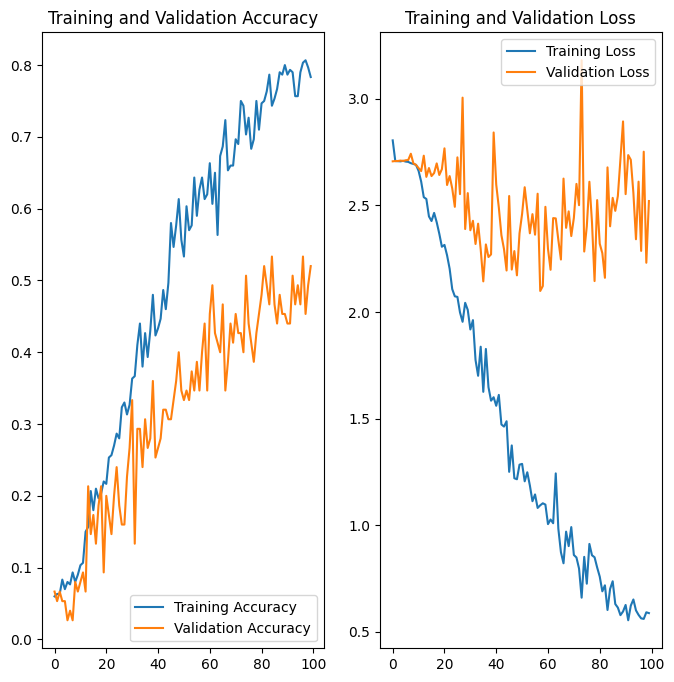

In [ ]:
acc = history_augmentation.history['accuracy']
val_acc = history_augmentation.history['val_accuracy']

loss = history_augmentation.history['loss']
val_loss = history_augmentation.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_alexnet2=keras.models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='softmax')


])

model_alexnet2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model_alexnet2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 30, 30, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 256)      

In [ ]:
history_alexnet2=model_alexnet2.fit(
    train_ds,
    epochs=200,
    validation_data=val_ds,
    validation_freq=1
)

Epoch 1/200
19/19 [==============================] - 17s 699ms/step - loss: 4.0568 - accuracy: 0.0967 - val_loss: 10.8016 - val_accuracy: 0.0667
Epoch 2/200
19/19 [==============================] - 15s 772ms/step - loss: 3.4555 - accuracy: 0.1267 - val_loss: 6.3325 - val_accuracy: 0.0667
Epoch 3/200
19/19 [==============================] - 13s 690ms/step - loss: 2.7872 - accuracy: 0.1800 - val_loss: 5.3206 - val_accuracy: 0.0533
Epoch 4/200
19/19 [==============================] - 13s 660ms/step - loss: 2.8006 - accuracy: 0.1667 - val_loss: 3.8622 - val_accuracy: 0.1067
Epoch 5/200
19/19 [==============================] - 13s 664ms/step - loss: 2.6893 - accuracy: 0.1600 - val_loss: 2.9882 - val_accuracy: 0.1200
Epoch 6/200
19/19 [==============================] - 14s 696ms/step - loss: 2.5161 - accuracy: 0.1933 - val_loss: 2.9311 - val_accuracy: 0.0933
Epoch 7/200
19/19 [==============================] - 13s 681ms/step - loss: 2.5316 - accuracy: 0.1667 - val_loss: 2.8957 - val_accuracy

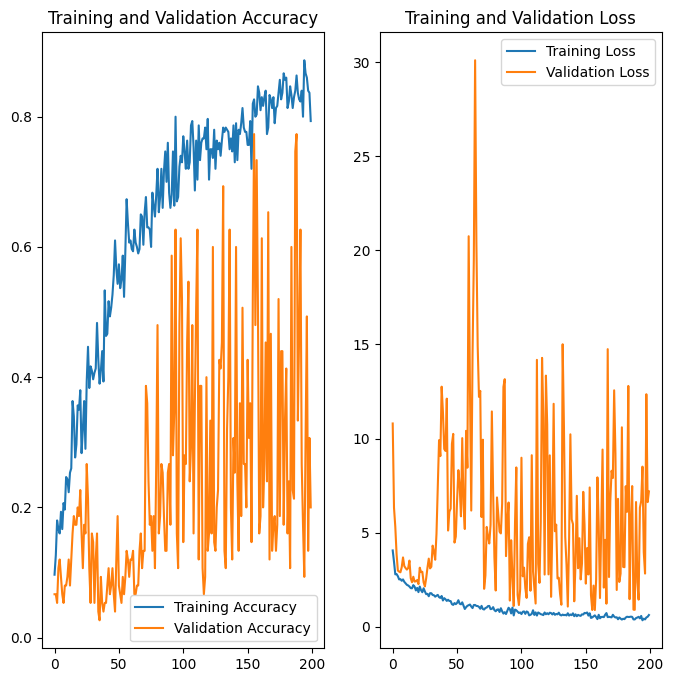

In [ ]:
epochs=200
acc = history_alexnet2.history['accuracy']
val_acc = history_alexnet2.history['val_accuracy']

loss = history_alexnet2.history['loss']
val_loss = history_alexnet2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
batch_size = 16
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 375 files belonging to 15 classes.
Using 300 files for training.
Found 375 files belonging to 15 classes.
Using 75 files for validation.


In [ ]:
def create_model(input_shape, n_classes, optimizer, fine_tune=0):
    base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = True  # Set the entire model as trainable

    if fine_tune > 0:
        for layer in base_model.layers[:-fine_tune]:
            layer.trainable = False
    else:
        base_model.trainable = False

    model = Sequential([
        base_model,  # Pre-trained base
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(n_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes = len(train_ds.class_names)

vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=2)
vgg_model.summary()

epochs = 15


history = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 4096)              102764544 
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_7 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                       

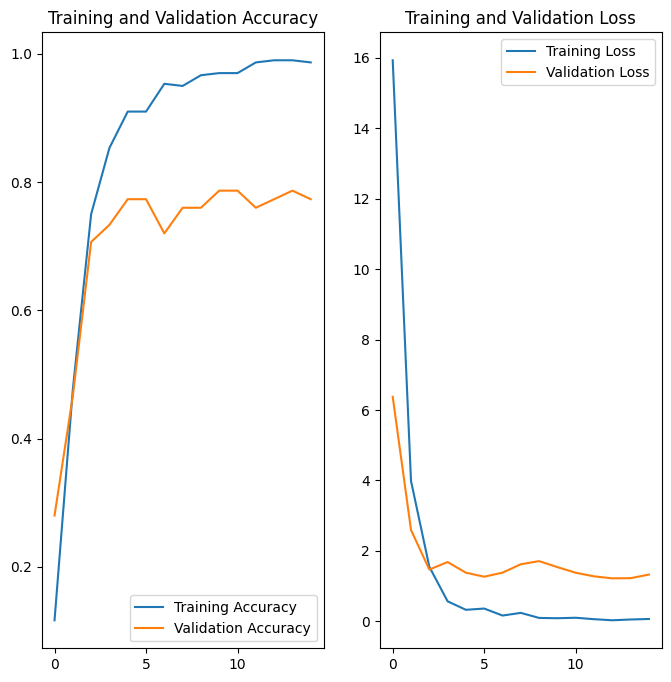

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

def get_final_accuracy(history):
    training_accuracy = history.history['accuracy'][-1]
    validation_accuracy = history.history['val_accuracy'][-1]
    return training_accuracy, validation_accuracy

accuracies = {
    'Basic CNN': get_final_accuracy(history_CNN),
    'CNN with Data Augmentation': get_final_accuracy(history_augmentation),
    'AlexNet-Inspired Model': get_final_accuracy(history_alexnet2),
    'VGG Model with Fine-Tuning': get_final_accuracy(history)
}


for model_name, (train_acc, val_acc) in accuracies.items():
    print(f"{model_name}: Training Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

Basic CNN: Training Accuracy = 0.9900, Validation Accuracy = 0.6133
CNN with Data Augmentation: Training Accuracy = 0.7833, Validation Accuracy = 0.5200
AlexNet-Inspired Model: Training Accuracy = 0.7933, Validation Accuracy = 0.2000
VGG Model with Fine-Tuning: Training Accuracy = 0.9867, Validation Accuracy = 0.7733


In [ ]:
model.save('basic_cnn_model.h5')
model2.save('cnn_with_augmentation_model.h5')
model_alexnet2.save('alexnet_inspired_model.h5')
vgg_model.save('vgg_finetuned_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

loaded_basic_cnn_model = load_model('basic_cnn_model.h5')
loaded_cnn_with_augmentation_model = load_model('cnn_with_augmentation_model.h5')
loaded_alexnet_model = load_model('alexnet_inspired_model.h5')
loaded_vgg_model = load_model('vgg_finetuned_model.h5')